<a href="https://colab.research.google.com/github/shanberochka/KFU_Term4_MathModeling/blob/main/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BC%D0%B0%D1%82_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_class_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab

## Right part of ODE

In [ ]:
def f(t, U):
  return float(format(-2*U + 4*t, '.56f'))

## Derivative of the right part of ODE

In [ ]:
def der_f(t, y):
  return -2

## Initial values
 - U_0 - initial value of decision
 - t_0 - start time
 - T - end time
 

In [ ]:
U_0 = 3
t_0 = 0
T = 1

## Analytic decision

In [ ]:
def analytic_decision(t):
  C = float(format((U_0 + 1 -2*t_0)*np.exp(2*t_0), '.56f'))
  li = (list(map('{:.56f}'.format, C*np.exp(-2*t) +2*t - 1)))
  return [float(i) for i in li]

In [ ]:
class Analysis:
  def __init__(self, U_00, t_00, T0, num, f, der_f, analytic_decision, method='All'):#, research = 'plot'
    self.U_0 = U_00
    self.t_0 = t_00
    self.T = T0
    # num - the value of step
    self.N = [10**i for i in range(1,num+1)]
    self.h_N = [(self.T - self.t_0)/n for n in self.N]

    self.f = f
    self.analytic_decision = analytic_decision
    self.der_f = der_f

    self.times_N = self.get_time()
    self.analytic_f = self.get_analytic_f()

    self.method = method

    self.epsilons = [10**(-i) for i in range(0, 9)]

    self.deltas = [-10e-1, -5*10e-2, 0, 5*10e-2, 10e-1]

    self.N_to_eps = [10, 100]
    self.h_to_eps = [(self.T - self.t_0 )/n for n in self.N_to_eps]
    self.time_to_eps = []
    for n in self.N_to_eps:
      self.time_to_eps.append(np.linspace(self.t_0, self.T, n))
    self.font = {'family': 'serif',
        'color': 'black',
        'weight' : 'bold',
        'size': 16}
    #self.research = research
  
  def get_time(self):
    times_N = []
    for n in self.N:
      time= np.linspace(self.t_0, self.T, num = n+1)
      times_N.append(time)
    return times_N
  
  def get_analytic_f(self):
    analytic_f_N = []
    for time in self.times_N:
      analytic_f = self.analytic_decision(time)
      analytic_f_N.append(analytic_f)
    return analytic_f_N
  
  def Eyler(self, U0, times_N, h_N):
    Y_N= []
    for time in times_N:
      Y = []
      y_i = U0
      Y.append(y_i)
      for t in time[:-1]:
        y_ii = y_i + h_N[times_N.index(time)]*self.f(t, y_i)
        Y.append(y_ii)
        y_i = y_ii
      Y_N.append(Y)
    return Y_N
  
  def Runge_Kutte(self, U0, times_N, h_N):
    Y_N= []
    for time in times_N:
      Y = []
      h_index = times_N.index(time)
      y_i = U0
      Y.append(y_i)
      for t in time[:-1]:
        K_1_i = self.f(t, y_i)
        K_2_i = self.f(t + h_N[h_index]/2, y_i + h_N[h_index]/2 * K_1_i)
        K_3_i = self.f(t + h_N[h_index]/2, y_i + h_N[h_index]/2 * K_2_i)
        K_4_i = self.f(t + h_N[h_index], y_i + h_N[h_index] * K_3_i)
        y_ii = y_i + h_N[h_index]/6 *(K_1_i + 2 * K_2_i + 2 * K_3_i + K_4_i)
        Y.append(y_ii)
        y_i = y_ii
      Y_N.append(Y)
    return Y_N
  
  def Predictor_Corrector(self, U0, times_N, h_N):
    Y_N = []
    for time in times_N:
      Y=[]
      h_index = times_N.index(time)
      y_i = U0
      Y.append(y_i)
      for t in time[:-1]:
        y_1_ii = y_i + h_N[h_index]*self.f(t, y_i)
        y_2_ii = y_i + h_N[h_index]/2*(self.f(t, y_i)+self.f(time[((np.where(time == t)[0].tolist()[0]))+1], y_1_ii))
        Y.append(y_2_ii)
        y_i = y_2_ii
      Y_N.append(Y)
    return Y_N

  def Simple_Iterations(self, U0, times_N, h_N):
    Y_N = []
    eps = 1e-10
    #s_max = []
    for time in times_N:
      Y = []
      #max_ = 0
      h_index = times_N.index(time)
      y_i = U0
      Y.append(y_i)
      for t in time[:-1]:
        s = 0
        next_t = time[((np.where(time == t)[0].tolist()[0]))+1]
        y_old = y_i
        y_new = y_i + h_N[h_index]/2*(self.f(t, y_i)+self.f(next_t, y_old))
        delta = abs(y_new - y_old)
        y_old = y_new
        s+=1
        while (delta > eps) and (s < 10**(6)):
          y_new = y_i + h_N[h_index]/2*(self.f(t, y_i) + self.f(next_t, y_old))
          delta = abs(y_new - y_old)
          y_old = y_new
          s+=1
          if s%1000 == 0:
            print(s)
        #max_ = max(max_, s)
        y_i = y_old
        Y.append(y_i)
      #s_max.append(max_)
      Y_N.append(Y)
      print('Append#', h_index)
    return Y_N#, s_max

  def Simple_Iterations_eps(self, time_h, h_, eps, U0):
    Y_eps = []
    h = h_
    s_max = []
    time = time_h
    for e in eps:
      max_ = 0
      Y = []
      y_i = U0
      Y.append(y_i)
      for t in time[:-1]:
        s = 0
        next_t = t+h
        y_old = y_i
        y_new = y_i + h/2*(self.f(t, y_i) + self.f(next_t, y_old))
        delta = abs(y_old - y_new)
        y_old = y_new
        s+=1
        while (delta > e) and (s < 10**(7)):
          y_new = y_i + h/2*(self.f(t, y_i) + self.f(next_t, y_old))
          delta = abs(y_old - y_new)
          y_old = y_new
          s+=1
        max_ = max(max_, s)
        y_i = y_old
        Y.append(y_new)
      Y_eps.append(Y)
      s_max.append(max_)
    return Y_eps, s_max

  def Newton(self, U0, times_N, h_N):
    def F(t, next_t, x, old_y, h, f):
      return x - old_y - h/2*(f(t, old_y) + f(next_t, x))
    def der_F(next_t, x, h, der_f):
      return 1 - h/2*der_f(next_t, x)
    Y_N = []
    eps = 1e-10
    for time in times_N:
      Y = []
      h_index = times_N.index(time)
      y_i = U0
      Y.append(y_i)
      for t in time[:-1]:
        x = y_i
        next_t = t+h_N[h_index]
        Func = F(t, next_t, x, Y[-1], h_N[h_index], self.f)
        der_Func = der_F(next_t, x, h_N[h_index], self.der_f)
        x_next = x - Func/der_Func
        while (abs(x - x_next) > eps):
          x = x_next
          Func = F(t, next_t, x, Y[-1],h_N[h_index], self.f)
          der_Func = der_F(next_t, x, h_N[h_index], self.der_f)
          x_next = x - Func/der_Func
        y_i = x_next
        Y.append(y_i)
      Y_N.append(Y)
    return Y_N
  
  def Newton_eps(self, time_h, h_, eps, U0):
    def F(t, next_t, x, old_y, h, f):
      return x - old_y - h/2*(f(t, old_y) + f(next_t, x))
    def der_F(next_t, x, h, der_f):
      return 1 - h/2*der_f(next_t, x)
    Y_eps = []
    h = h_
    s_max = []
    time = time_h
    for e in eps:
      max_ = 0
      Y = []
      y_i = U0
      Y.append(y_i)
      for t in time[:-1]:
        s = 0
        next_t = t+h
        x = y_i
        Func = F(t, next_t, x, Y[-1], h, self.f)
        der_Func = der_F(next_t, x, h, self.der_f)
        x_next = x - Func/der_Func
        s+=1
        while ((abs(x - x_next) > e) and (s < 10**(7))):
          x = x_next
          Func = F(t, next_t, x, Y[-1], h, self.f)
          der_Func = der_F(next_t, x, h, self.der_f)
          x_next = x - Func/der_Func
          s+=1
        max_ = max(max_, s)
        y_i = x_next
        Y.append(y_i)
      Y_eps.append(Y)
      s_max.append(max_)
    return Y_eps, s_max

  def convergence_analysis(self, dist):
    fig = plt.figure(figsize=(10,10))
    plt.loglog(self.h_N, dist)
    plt.xlabel('h', fontdict=self.font)
    plt.ylabel('\u03C8', fontdict=self.font)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid(True)
  
  def convergence_analysis_with_eps(self, Y_eps, time, analytic_f, s_max):
      #n = len(Y_eps)
      #fig, axs = plt.subplots(n, figsize=(20,15))
      #fig.tight_layout(pad=3.0)
      #for i in range(n):
        #axs[i].plot(time[k], analytic_f, 'k.', label='точное решение', markersize=1);
        #axs[i].plot(time[k], Y_eps[i], 'r-', label='приближенное решение', linewidth=0.5);
        #axs[i].set(xlabel='t', ylabel='U', title=chr(i+97)+" Simple Iteratations eps={}".format(self.epsilons[i]));
        #axs[i].legend(loc='upper left');
    
    fig = plt.figure(figsize=(10,10))
    plt.semilogx(self.epsilons, s_max)
    plt.xlabel('\u03B5', fontdict=self.font)
    plt.ylabel('L', fontdict=self.font)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid(True);
  
  def sustainability_analysis(self):
    def analysis(Y_lasts, y_non_dist):
      diffs = []
      print(type(Y_lasts))
      print(type(y_non_dist))
      for i in range(len(Y_lasts)):
        diffs.append(abs(Y_lasts[i]-y_non_dist))
      table = pd.DataFrame(list(zip(self.deltas, Y_lasts, diffs)), columns=['delta','y_last','ksi'])
      print(table)

      fig = plt.figure(figsize=(10,10))
      plt.plot(self.deltas, diffs)
      plt.xlabel('\u03B4', fontdict=self.font)
      plt.ylabel('\u03C7', fontdict=self.font)
      plt.xticks(size = 15)
      plt.yticks(size = 15)
      
    N = 100
    times_N = [np.linspace(self.t_0, self.T, num=N)]
    h_N = [(self.T - self.t_0)/N]
    Y_lasts = []
    diffs = []
    if (self.method == 'Eyler'):
      for delta in self.deltas:
        Y_N_Eyler_delta = self.Eyler(self.U_0+delta, times_N, h_N)
        Y_lasts.append(Y_N_Eyler_delta[0][-1])
        if (delta == 0):
          y_non_dist = Y_N_Eyler_delta[0][-1]
      analysis(Y_lasts, y_non_dist)

    if (self.method == 'Runge-Kutte'):
      for delta in self.deltas:
        Y_N_RK_delta = self.Runge_Kutte(self.U_0+delta, times_N, h_N)
        Y_lasts.append(Y_N_RK_delta[0][-1])
        if (delta == 0):
          y_non_dist = Y_N_RK_delta[0][-1]
      analysis(Y_lasts, y_non_dist)

    if (self.method == 'Predictor-Corrector'):
      for delta in self.deltas:
        Y_N_PC_delta = self.Predictor_Corrector(self.U_0+delta, times_N, h_N)
        Y_lasts.append(Y_N_PC_delta[0][-1])
        if (delta == 0):
          y_non_dist = Y_N_PC_delta[0][-1]
      analysis(Y_lasts, y_non_dist)

    if (self.method == 'Simple Iterations'):
      for delta in self.deltas:
        Y_N_SI_delta = self.Simple_Iterations(self.U_0+delta, times_N, h_N)
        Y_lasts.append(Y_N_SI_delta[0][-1])
        if (delta == 0):
          y_non_dist = Y_N_SI_delta[0][-1]
      analysis(Y_lasts, y_non_dist)
    
    if (self.method == 'Newton'):
      for delta in self.deltas:
        Y_N_Newton_delta = self.Newton(self.U_0+delta, times_N, h_N)
        Y_lasts.append(Y_N_Newton_delta[0][-1])
        if (delta == 0):
          y_non_dist = Y_N_Newton_delta[0][-1]
      analysis(Y_lasts, y_non_dist) 

  def distance(self,Y, A):
    d = []
    for y, a in zip(Y, A):
      d.append(abs(y-a))
    return max(d)

  def plot_graphics(self, A, Y, label):
    n = len(Y)
    fig, axs = plt.subplots(n, figsize=(20,60))
    fig.tight_layout(pad=3.0)
    for i in range(n):
      axs[i].plot(self.times_N[i], A[i], 'k.', label='точное решение', markersize=1);
      axs[i].plot(self.times_N[i], Y[i], 'r-', label='приближенное решение', linewidth=0.5);
      axs[i].set(xlabel='t', ylabel='U', title=chr(i+97)+" " + label);
      axs[i].legend(loc='upper left');

  def train(self):
    if (self.method == 'Eyler'):
      Y_N_Eyler = self.Eyler(self.U_0, self.times_N, self.h_N)
      self.plot_graphics(self.analytic_f, Y_N_Eyler, 'Eyler')
      diff_Eyler = [self.distance(Y_N_Eyler[i], self.analytic_f[i]) for i in range(len(Y_N_Eyler))]
      table = pd.DataFrame(list(zip(self.h_N, diff_Eyler)), columns=['h','\u03C8'])
      print('Eyler')
      print(table)
      self.convergence_analysis(diff_Eyler)
      self.sustainability_analysis()
      
    elif (self.method == 'Runge-Kutte'):
      Y_N_RK = self.Runge_Kutte(self.U_0, self.times_N, self.h_N)
      self.plot_graphics(self.analytic_f, Y_N_RK, 'Runge-Kutte')
      diff_RK = [self.distance(Y_N_RK[i], self.analytic_f[i]) for i in range(len(Y_N_RK))]
      table = pd.DataFrame(list(zip(self.h_N, diff_RK)), columns=['h','\u03C8'])
      print('Runge-Kutte')
      print(table)
      self.convergence_analysis(diff_RK)
      self.sustainability_analysis()

    elif (self.method == 'Predictor-Corrector'):
      Y_N_PC = self.Predictor_Corrector(self.U_0, self.times_N, self.h_N)
      self.plot_graphics(self.analytic_f, Y_N_PC, 'Predictor-Corrector')
      diff_PC = [self.distance(Y_N_PC[i], self.analytic_f[i]) for i in range(len(Y_N_PC))]
      table = pd.DataFrame(list(zip(self.h_N, diff_PC)), columns=['h','\u03C8'])
      print('Predictor-Corrector')
      print(table)
      self.convergence_analysis(diff_PC)

    elif (self.method == 'Simple Iterations'):
      Y_N_SI = self.Simple_Iterations(self.U_0, self.times_N, self.h_N)
      print('len Y=', len(Y_N_SI))
      self.plot_graphics(self.analytic_f, Y_N_SI, 'Simple Iteratations')
      diff_SI = [self.distance(Y_N_SI[i], self.analytic_f[i]) for i in range(len(Y_N_SI))]
      table = pd.DataFrame(list(zip(self.h_N, diff_SI)), columns=['h','\u03C8'])
      print('Simple Iterations')
      print(table)
      self.convergence_analysis(diff_SI)
      self.sustainability_analysis()
      
    elif (self.method == 'Simple Iterations eps'):
      N = self.N_to_eps
      h = self.h_to_eps
      time = self.time_to_eps
      eps = self.epsilons
      for k in range(len(N)):
        Y_N_SI, s_max = self.Simple_Iterations_eps(time[k], h[k], eps, self.U_0)
        analytic_f = self.analytic_decision(time[k])
        diff_SI = [self.distance(Y_N_SI[k], analytic_f) for i in range(len(Y_N_SI))]
        table = pd.DataFrame(list(zip(eps, diff_SI, s_max)), columns=['eps', '\u03C8','s_max'])
        print('Simple Iteratations')
        print(table)
        self.convergence_analysis_with_eps(Y_N_SI, time, analytic_f, s_max)
    
    elif (self.method == 'Newton'):
      Y_N_Newton = self.Newton(self.U_0, self.times_N, self.h_N)
      self.plot_graphics(self.analytic_f, Y_N_Newton, 'Newton')
      diff_Newton = [self.distance(Y_N_Newton[i], self.analytic_f[i]) for i in range(len(Y_N_Newton))]
      table = pd.DataFrame(list(zip(self.h_N, diff_Newton)), columns=['h','\u03C8'])
      print('Newton')
      print(table)
      self.convergence_analysis(diff_Newton)
      self.sustainability_analysis()

    elif (self.method == 'Newton eps'):
      N = self.N_to_eps
      h = self.h_to_eps
      time = self.time_to_eps
      eps = self.epsilons
      for k in range(len(N)):
        Y_N_Newton, s_max = self.Newton_eps(time[k], h[k], eps, self.U_0)
        analytic_f = self.analytic_decision(time[k])
        diff_Newton = [self.distance(Y_N_Newton[k], analytic_f) for i in range(len(Y_N_Newton))]
        table = pd.DataFrame(list(zip(eps, diff_Newton, s_max)), columns=['eps', '\u03C8','s_max'])
        print('Newton')
        print(table)
        self.convergence_analysis_with_eps(Y_N_Newton, time, analytic_f, s_max)
    else:
      print("Method is not defined")

# Class Analysis:
- U_0 - initial value of decision
- t_0 - ititial time
- T - end time
- num(in our case 5) - parametr to make interval with $10^{-i}$ points, where i = $\overline{(1, num)}$
- f - right part of DE
- der_f - the derivative of f function
- analytic_decision - analytic decision 
- method - method to solve DE(following can be choosen): 
 - Eyler
 - Runge-Kutte
 - Predictor-Corrector
 - Simple Iterations
 - Simple Iterations with changing epsilon
 - Newton


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Eyler
          h         ψ
0  0.100000  0.160798
1  0.010000  0.014839
2  0.001000  0.001473
3  0.000100  0.000147
4  0.000010  0.000015
5  0.000001  0.000001
<class 'list'>
<class 'float'>
   delta    y_last       ksi
0   -1.0  1.397244  0.135326
1   -0.5  1.464907  0.067663
2    0.0  1.532570  0.000000
3    0.5  1.600233  0.067663
4    1.0  1.667896  0.135326


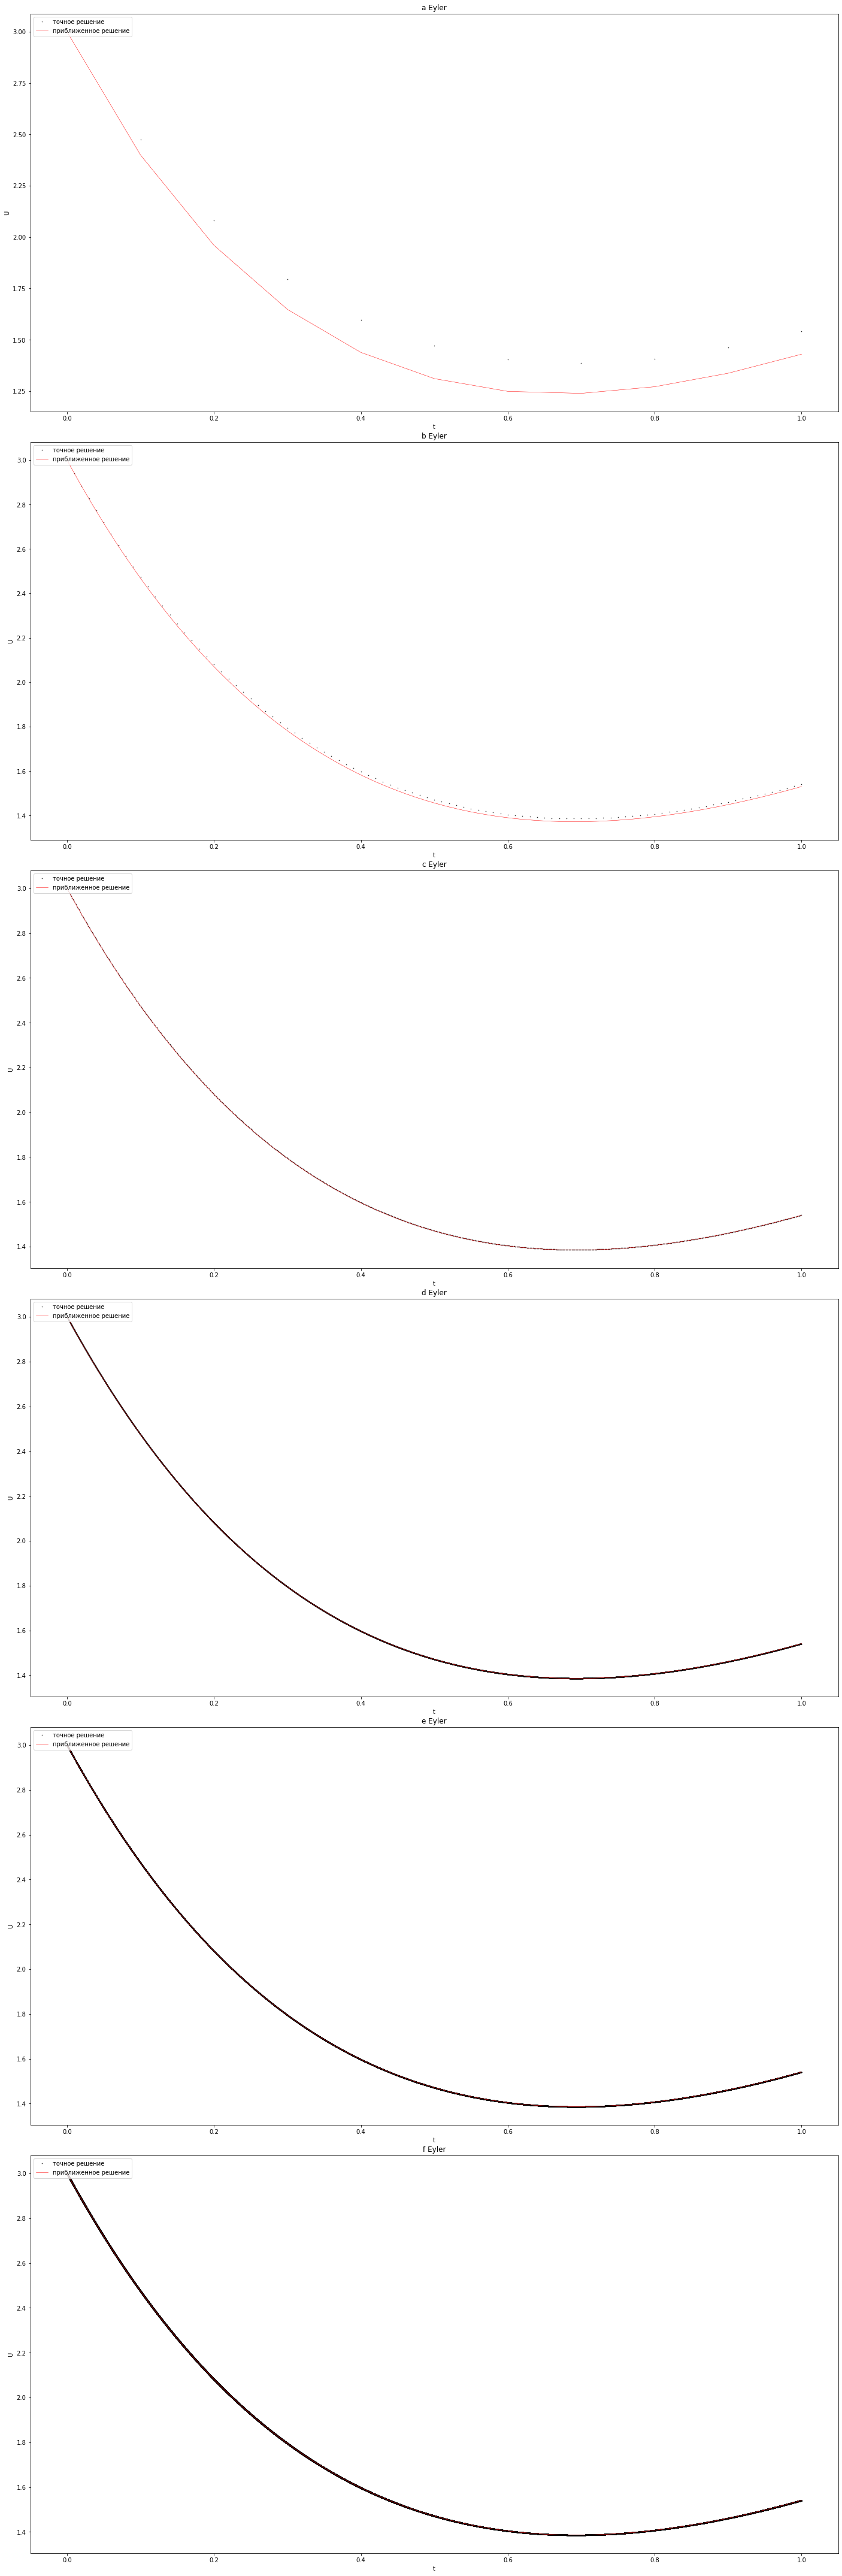

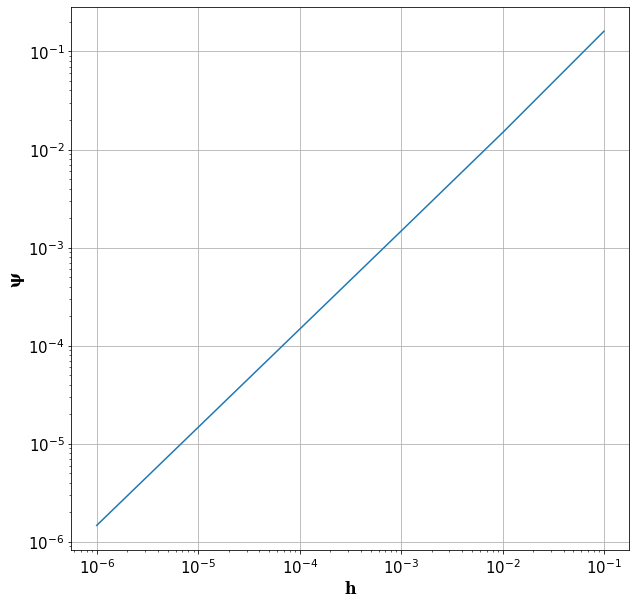

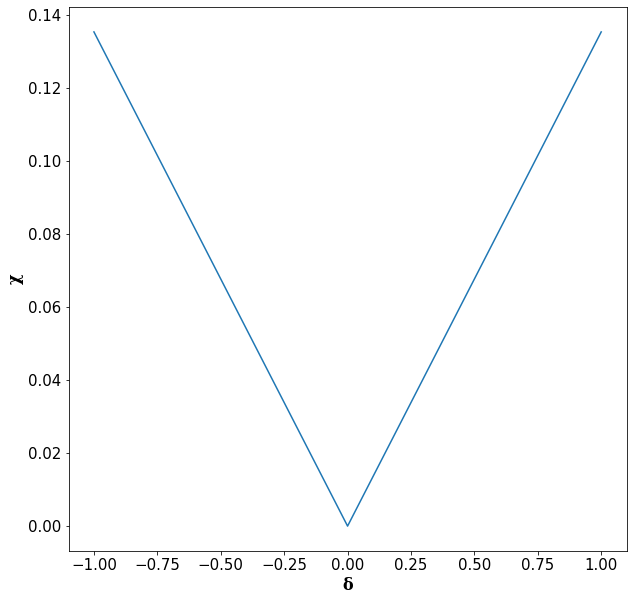

In [ ]:
table = Analysis(U_0, t_0, T, 6, f, der_f, analytic_decision, method = 'Eyler')
table.train()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Runge-Kutte
          h             ψ
0  0.100000  2.318782e-05
1  0.010000  1.995006e-09
2  0.001000  1.976197e-13
3  0.000100  6.661338e-15
4  0.000010  2.198242e-14
5  0.000001  5.662137e-14
<class 'list'>
<class 'float'>
   delta    y_last       ksi
0   -1.0  1.405414  0.138069
1   -0.5  1.474449  0.069035
2    0.0  1.543483  0.000000
3    0.5  1.612518  0.069035
4    1.0  1.681552  0.138069


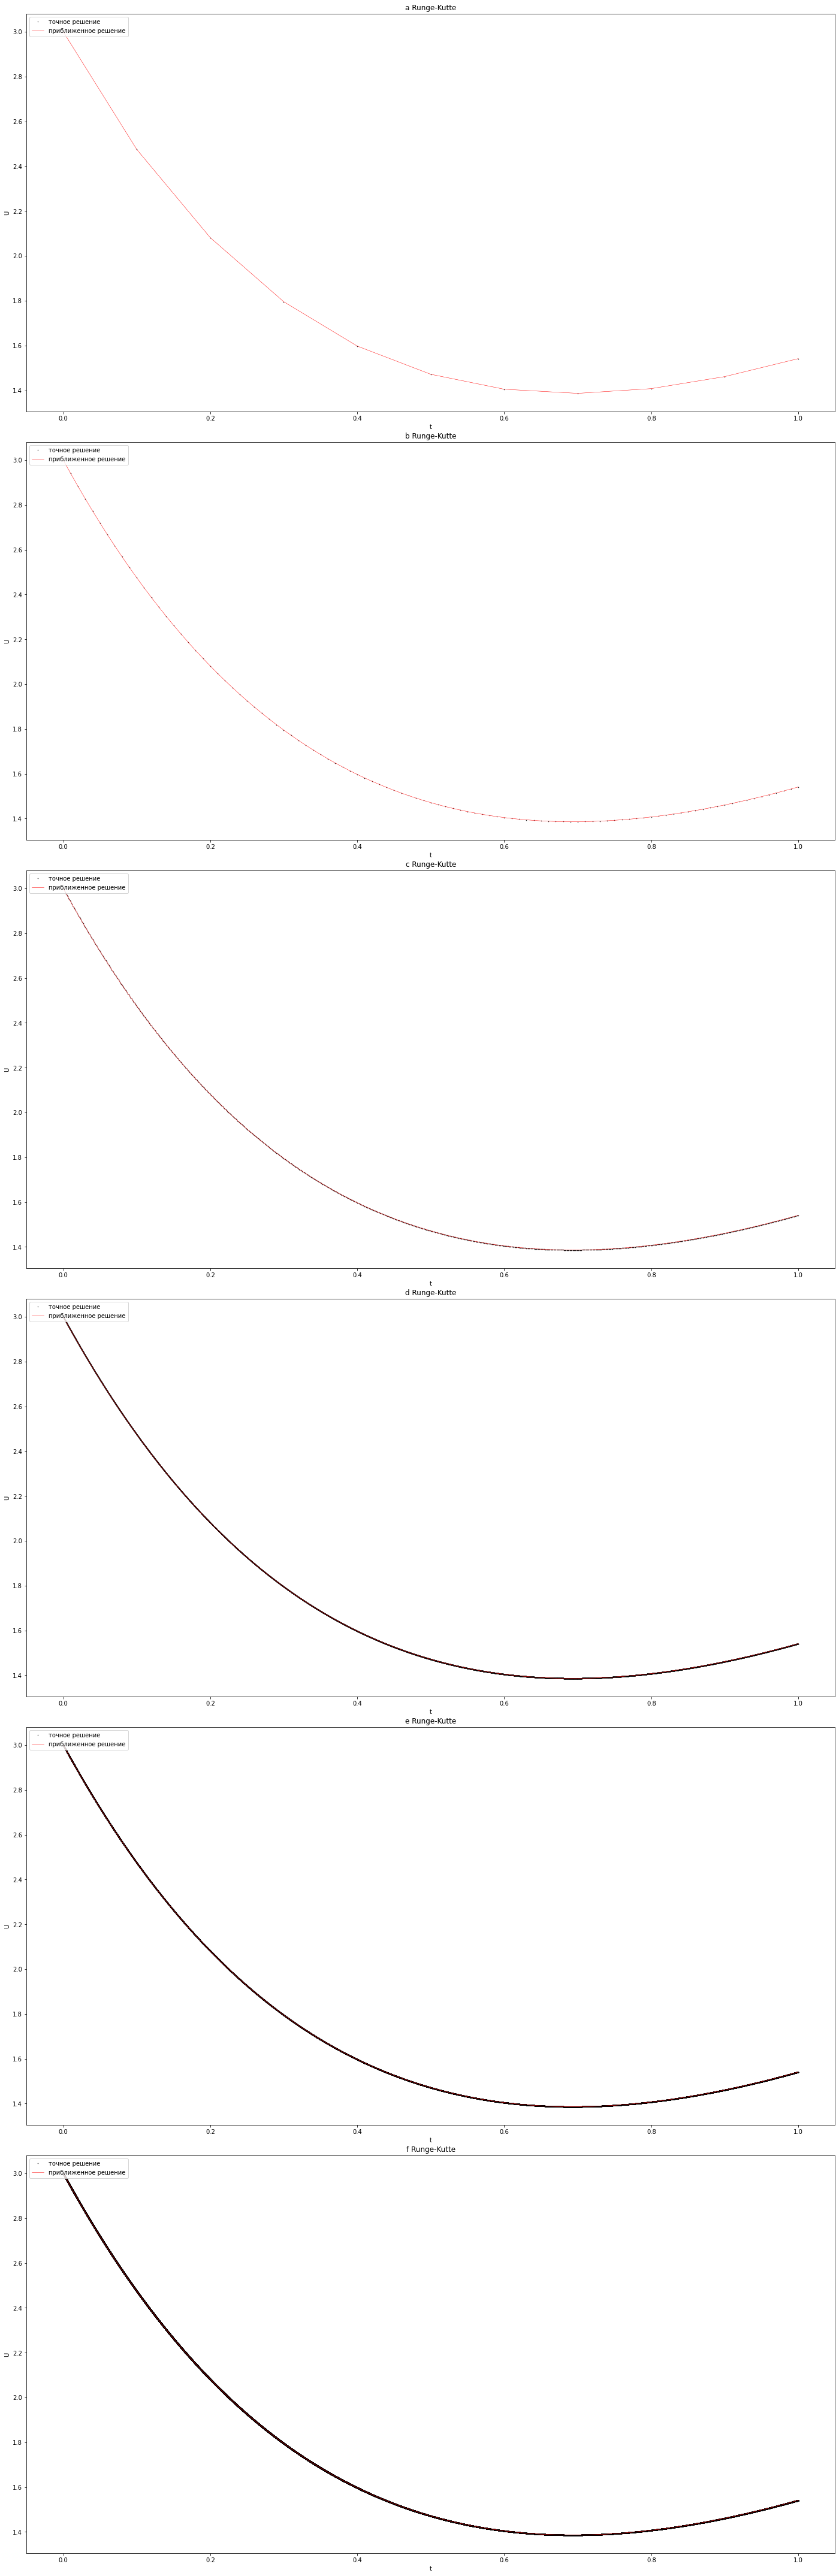

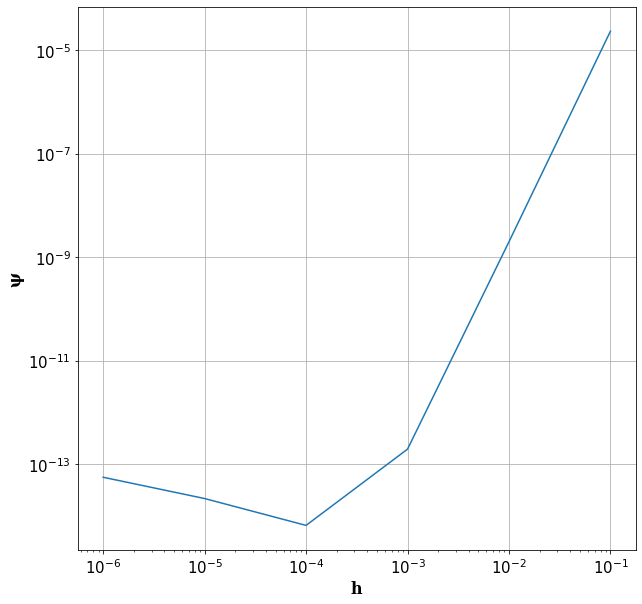

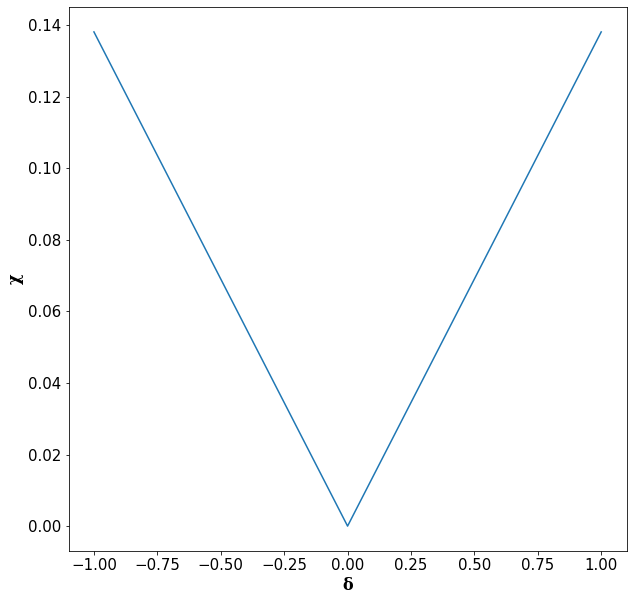

In [ ]:
table = Analysis(U_0, t_0, T, 6, f, der_f, analytic_decision, method = 'Runge-Kutte')
table.train()

In [ ]:
table = Analysis(U_0, t_0, T, 6, f, der_f, analytic_decision, method = 'Predictor-Corrector')
table.train()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


KeyboardInterrupt: ignored

Append# 0
Append# 1
Append# 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Append# 3
Append# 4
len Y= 5
Simple Iterations
         h             ψ
0  0.10000  4.926436e-03
1  0.01000  4.905272e-05
2  0.00100  4.905053e-07
3  0.00010  4.905897e-09
4  0.00001  4.905076e-11
Append# 0
Append# 0
Append# 0
Append# 0
Append# 0
<class 'list'>
<class 'float'>
   delta    y_last      ksi
0   -1.0  1.405474  0.13806
1   -0.5  1.474504  0.06903
2    0.0  1.543534  0.00000
3    0.5  1.612564  0.06903
4    1.0  1.681594  0.13806


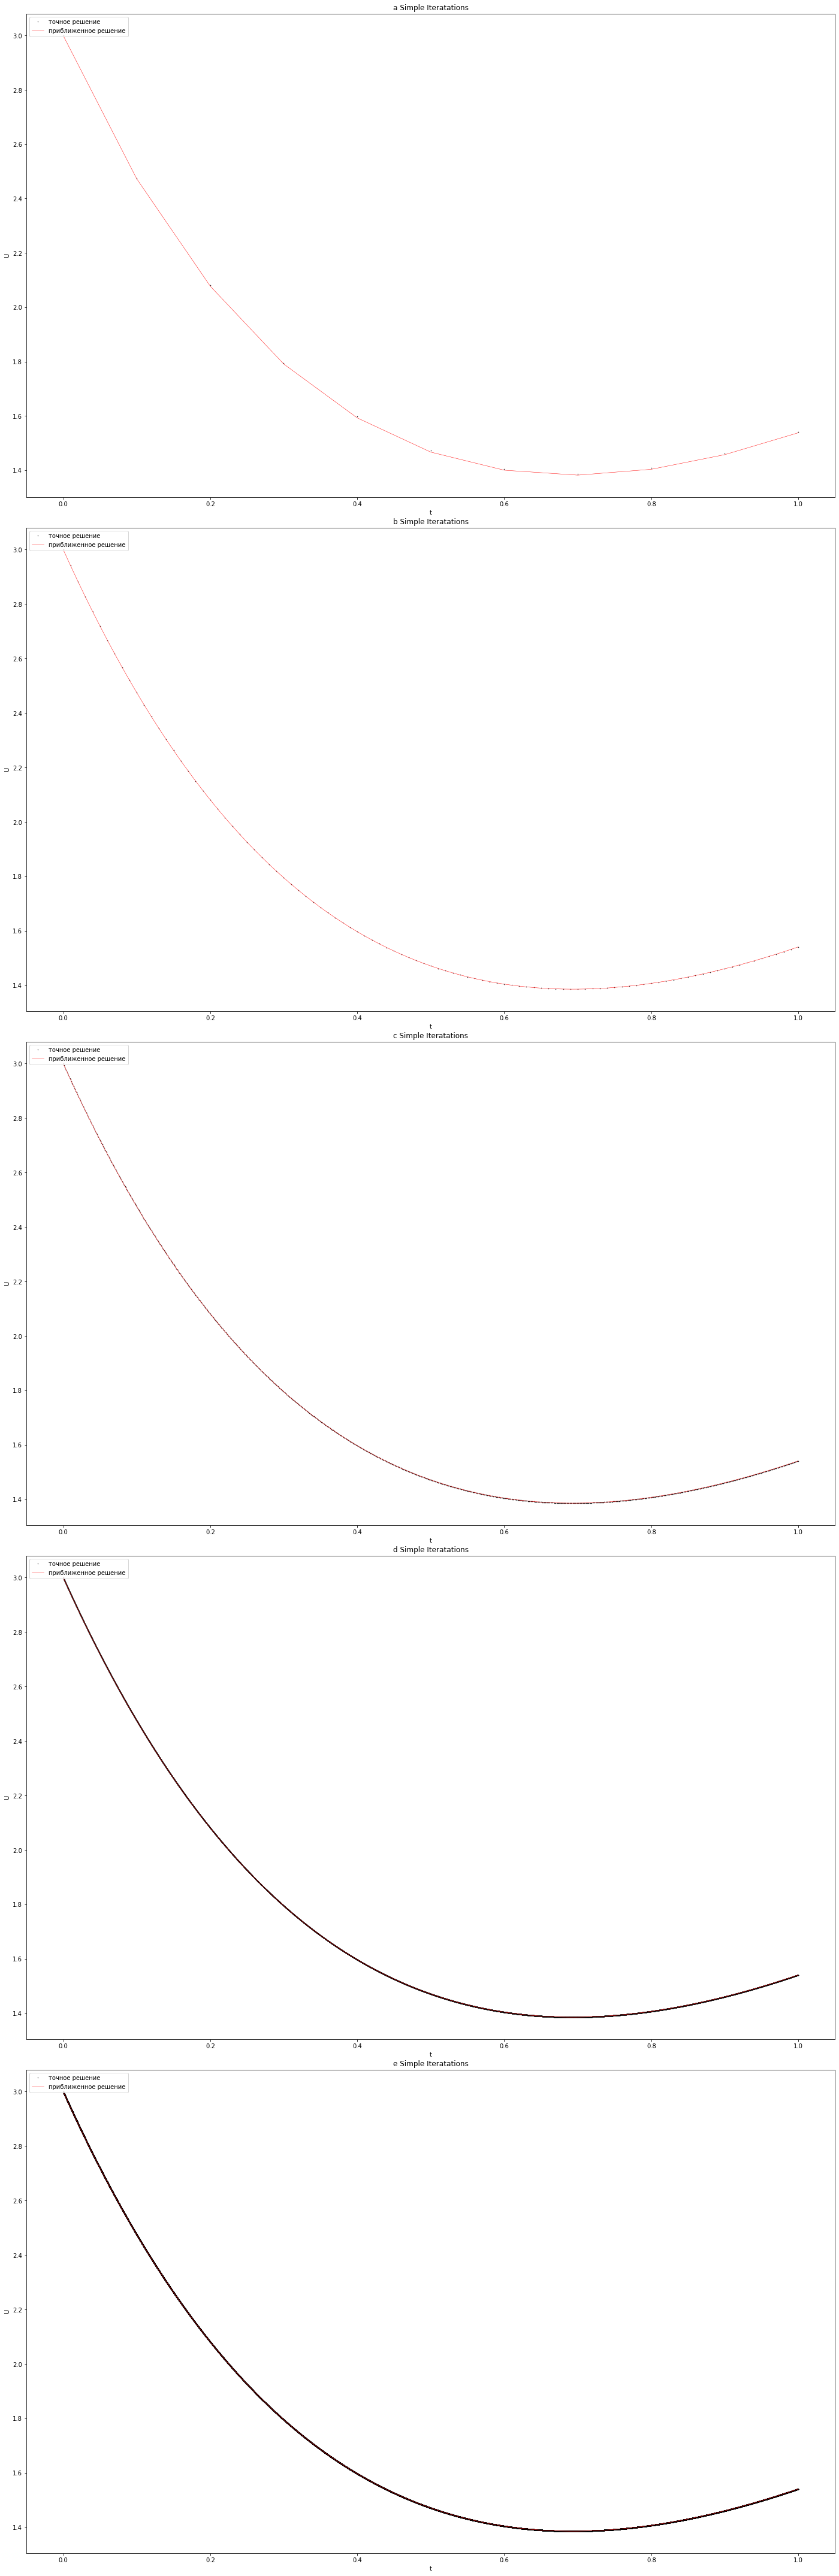

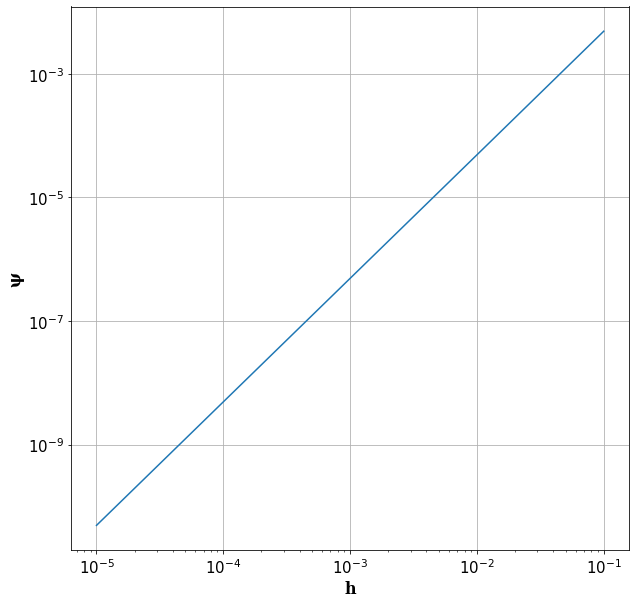

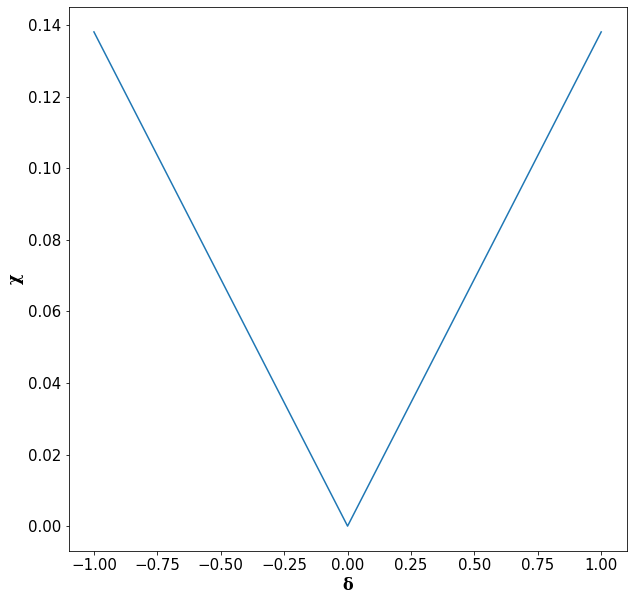

In [ ]:
table = Analysis(U_0, t_0, T, 5, f, der_f, analytic_decision, method = 'Simple Iterations')
table.train()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:166: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Newton
          h             ψ
0  0.100000  4.926436e-03
1  0.010000  4.905272e-05
2  0.001000  4.905061e-07
3  0.000100  4.905062e-09
4  0.000010  4.906076e-11
5  0.000001  4.902745e-13
<class 'list'>
<class 'float'>
   delta    y_last      ksi
0   -1.0  1.405387  0.13806
1   -0.5  1.474417  0.06903
2    0.0  1.543447  0.00000
3    0.5  1.612477  0.06903
4    1.0  1.681507  0.13806


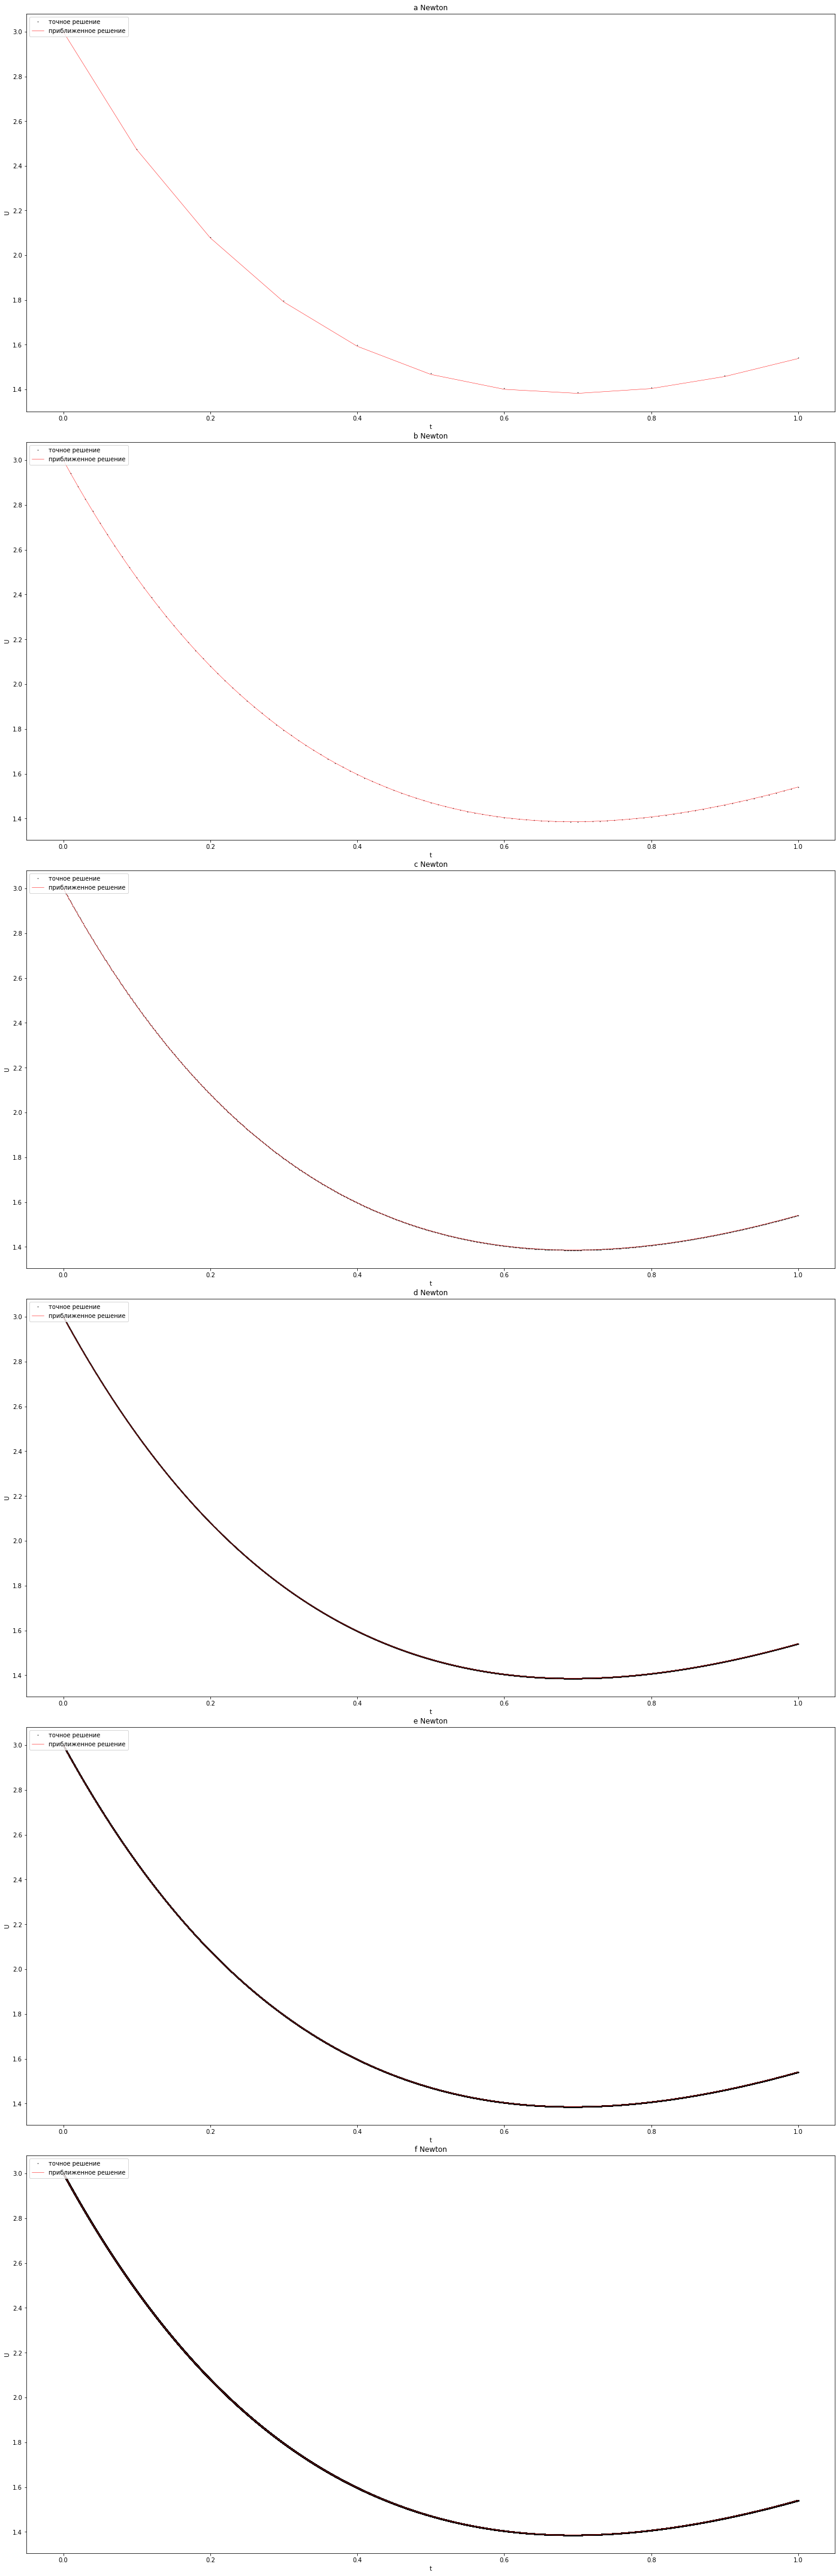

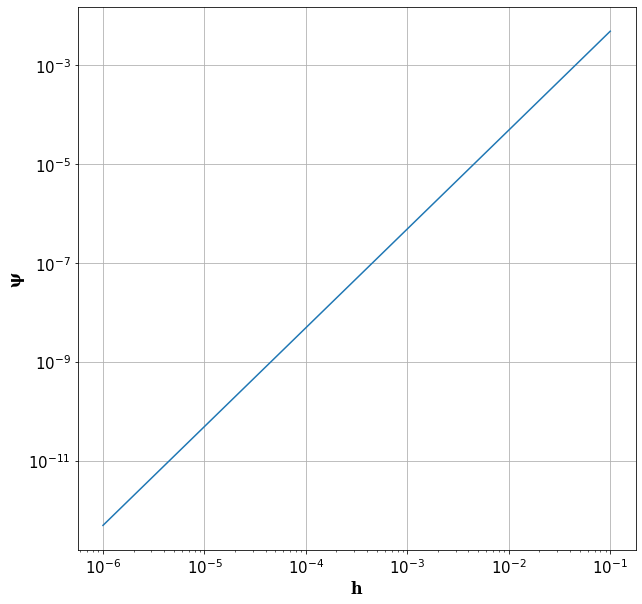

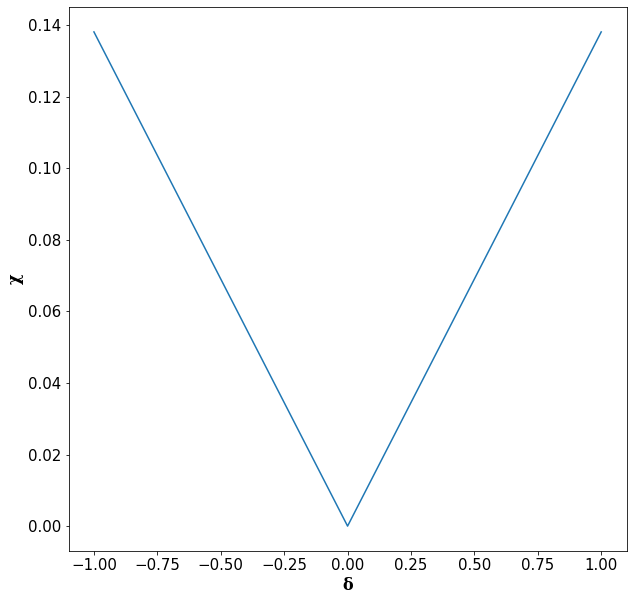

In [ ]:
table = Analysis(U_0, t_0, T, 6, f, der_f, analytic_decision, method = 'Newton')
table.train()

Simple Iteratations
            eps         ψ  s_max
0  1.000000e+00  0.014212      1
1  1.000000e-01  0.014212      2
2  1.000000e-02  0.014212      3
3  1.000000e-03  0.014212      4
4  1.000000e-04  0.014212      5
5  1.000000e-05  0.014212      6
6  1.000000e-06  0.014212      7
7  1.000000e-07  0.014212      8
8  1.000000e-08  0.014212      9
Simple Iteratations
            eps         ψ  s_max
0  1.000000e+00  0.000125      1
1  1.000000e-01  0.000125      1
2  1.000000e-02  0.000125      2
3  1.000000e-03  0.000125      2
4  1.000000e-04  0.000125      3
5  1.000000e-05  0.000125      3
6  1.000000e-06  0.000125      4
7  1.000000e-07  0.000125      4
8  1.000000e-08  0.000125      5


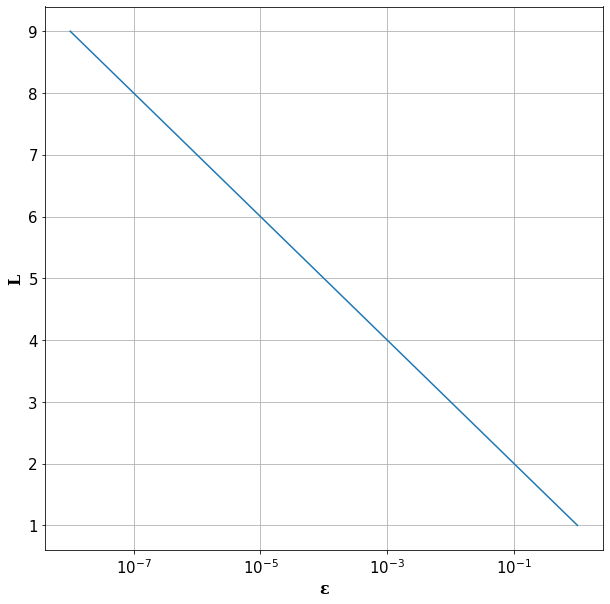

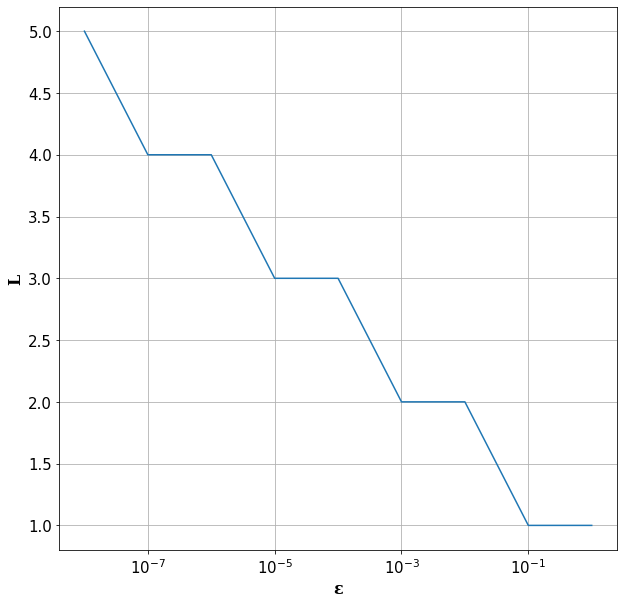

In [ ]:
table = Analysis(U_0, t_0, T, 6, f, der_f, analytic_decision, method = 'Simple Iterations eps')
table.train()

Newton
            eps         ψ  s_max
0  1.000000e+00  0.081885      1
1  1.000000e-01  0.081885      2
2  1.000000e-02  0.081885      2
3  1.000000e-03  0.081885      2
4  1.000000e-04  0.081885      2
5  1.000000e-05  0.081885      2
6  1.000000e-06  0.081885      2
7  1.000000e-07  0.081885      2
8  1.000000e-08  0.081885      2
Newton
            eps        ψ  s_max
0  1.000000e+00  0.00883      1
1  1.000000e-01  0.00883      1
2  1.000000e-02  0.00883      2
3  1.000000e-03  0.00883      2
4  1.000000e-04  0.00883      2
5  1.000000e-05  0.00883      2
6  1.000000e-06  0.00883      2
7  1.000000e-07  0.00883      2
8  1.000000e-08  0.00883      2


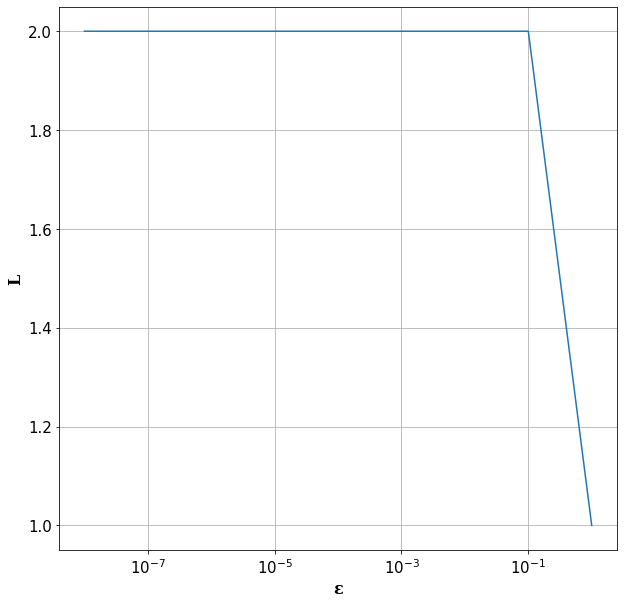

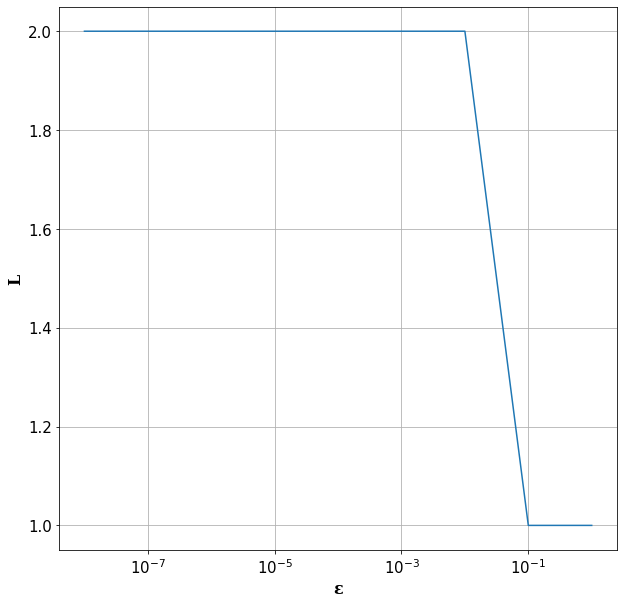

In [ ]:
table = Analysis(U_0, t_0, T, 6, f, der_f, analytic_decision, method = 'Newton eps')
table.train()